In [154]:
import re
def startsWithDateTime(s,date_pattern):
    
    result = re.match(date_pattern, s)
    #print (result,s)
    if result:
        
        return True

    return False
    


In [159]:
import emoji
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    
    result = re.match(pattern, s)
    
    #if s.count("changed")>0:
        #print (result,s)
    if result:
        return True
    else:
        if s.count(':')==1 and s.count("changed the subject")==0 :
            #print (result,s)
            return True
        
    return False

In [160]:
def getDataPoint(line):
    # line = 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?
    
    splitLine = line.split(' - ') # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?']
    #print (splitLine)
    dateTime = splitLine[0] # dateTime = '18/06/17, 22:47'
    #print (dateTime)
    date, time = dateTime.split(', ') # date = '18/06/17'; time = '22:47'
    #print (date,time)
    message = ' '.join(splitLine[1:]) # message = 'Loki: Why do you have 2 numbers, Banner?'
    #print (message)
    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0] # author = 'Loki'
        #print (author)
        message = ' '.join(splitMessage[1:]) # message = 'Why do you have 2 numbers, Banner?'
        #print (message)
    else:
        author = None
    #print (date,time,author,message)
    return date, time, author, message

In [161]:
data_frame_data = {'dd_pattern': ['^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), (([0-9]|)[0-9]):([0-9][0-9])(\s*)(([a|p]m)*|([A|P]M)*)*(\s*)-',[]],
                                     'mm_pattern': ['^(((0)[0-9]|[0-9])|((1)[0-2]))(\/)(([0-2][0-9]|(3)[0-1])|[1-9])(\/)(\d{2}|\d{4}), (([0-9]|)[0-9]):([0-9][0-9])(\s*)(([a|p]m)*|([A|P]M)*)*(\s*)-',[]]}


#conversationPath = "D:\Localgit\PythonWork\ChatAnalyzer\WhatsApp Chat with av.txt"
conversationPath = "D:\Localgit\PythonWork\ChatAnalyzer\WhatsApp Chat with SORRU THA MUKIYAM.txt"



for date_pattern in  data_frame_data.values():
    with open(conversationPath, encoding="utf-8") as fp:
        fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)

        messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
        date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed




        while True:
            line = fp.readline()
            #print (line)
            if not line: # Stop reading further if end of file has been reached
                date_pattern[1].append([date, time, author, ' '.join(messageBuffer)])
                break
            #print (line)
            line = line.strip()# Guarding against erroneous leading and trailing whitespaces

            if startsWithDateTime(line,date_pattern[0]): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
                if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                    #print (messageBuffer)
                    date_pattern[1].append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
                messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
                date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
                #print (date, time, author, message)
                messageBuffer.append(message) # Append message to buffer

            else:
                messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer

                
if len(data_frame_data['dd_pattern'][1]) > len(data_frame_data['mm_pattern'][1]):
    parsedData = data_frame_data['dd_pattern'][1]
else:
    parsedData = data_frame_data['mm_pattern'][1]
    

In [162]:
import pandas as pd

df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.head()


,Date,Time,Author,Message
0,27/04/20,2:38 pm,WIPRO.VIMALSREE.,<Media omitted>
1,27/04/20,2:38 pm,WIPRO.VIMALSREE.,<Media omitted>
2,27/04/20,2:41 pm,R@$€ T€RR@R,wowwwww
3,27/04/20,2:43 pm,WIPRO.RAHINI.SCCM.,nice
4,27/04/20,2:43 pm,WIPRO.MANICKAM.,Soruna udane vanthuru


In [163]:
dd_pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), (([0-9]|)[0-9]):([0-9][0-9])(\s*)(([a|p]m)*|([A|P]M)*)*(\s*)-'
mm_pattern = '^(((0)[0-9]|[0-9])|((1)[0-2]))(\/)(([0-2][0-9]|(3)[0-1])|[1-9])(\/)(\d{2}|\d{4}), (([0-9]|)[0-9]):([0-9][0-9])(\s*)(([a|p]m)*|([A|P]M)*)*(\s*)-'
#for n in range(33):
    #s="11/"+str(n)+"/18, 9:23 PM - +91 98941 98907: Po ma anguttu!"
    #s="25/10/2019, 07:55 - You were added"
    #s="05/10/17, 6:26 PM - Alexander VZ: Alex.playboy.ander@gmail.com"
    #print (re.match(mm_pattern, s))


#s="25/10/2019, 07:53 -ad sdfsdf"

#print (re.match('^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)2019,(\s*)07:53(s*)(([a|p]m)*|([A|P]M)*)*(\s*)-ad', s))


In [165]:
max_date = pd.to_datetime(df['Date'] + ' ' + df['Time']).max()
min_date = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='ignore').min()

print (max_date)
print (min_date)

2020-04-30 23:15:00
2020-01-05 10:05:00


In [166]:
#Row 5
date_group=df.groupby(['Date'])

long_day_list = df.loc[df['Date']==date_group.Message.count().idxmax(),['Author','Message']]

long_day_list = [(author.Author,author.Message) for author in long_day_list.itertuples()]

#time_group=)
time_group = pd.to_datetime(df['Time']).apply(lambda s: str(s.hour))

time_group = [n for n in time_group.value_counts()[:10].items()]

format_type = ["%d/%m/%Y","%m/%d/%Y","%d/%m/%y","%m/%d/%y"]

for ft in format_type:
    try:
        print (ft)
        dt_group = pd.to_datetime(df['Date'],format=ft,errors='raise')
    except:
        print ("Date Format failed  ", ft)
    else:
        print ("Date Format is ", ft)

#year_group = pd.to_datetime(df['Date']).apply(lambda s: str(s.year)+' ' +str(s.month_name()))
year_group = dt_group.apply(lambda s: str(s.year)+' ' +str(s.month_name()))

year_group = [n for n in year_group.value_counts()[:10].items()]
print (year_group)
#cal_group = pd.to_datetime(df['Date'],format=("%d/%m/%Y"),errors='ignore')

cal_group = [n for n in dt_group.value_counts()[:50].items()]
cal_group

#print (df.loc[df['Date']=="11/04/2020"])
#cal_group[-16][0].strftime('%Y%m%d')

max_date = dt_group.max().date()
print (max_date)
min_date = dt_group.min().date()
print (min_date)

date_diff = max_date - min_date
print (date_diff.days)
max_date = str(max_date)+' '+df['Time'][df['Time'].last_valid_index()]
max_date
min_date = str(min_date)+' '+df['Time'][0]
min_date

%d/%m/%Y
Date Format failed   %d/%m/%Y
%m/%d/%Y
Date Format failed   %m/%d/%Y
%d/%m/%y
Date Format is  %d/%m/%y
%m/%d/%y
Date Format failed   %m/%d/%y
[('2020 April', 416), ('2020 May', 37)]
2020-05-01
2020-04-27
4


'2020-04-27 2:38 pm'

WIPRO.RAHINI.SCCM.    129
WIPRO.MANICKAM.        95
R@$€ T€RR@R            95
WIPRO.RAJESHKUMAR.     83
WIPRO.VIMALSREE.       36
WIPRO.SANGETHA.         9
Name: Author, dtype: int64


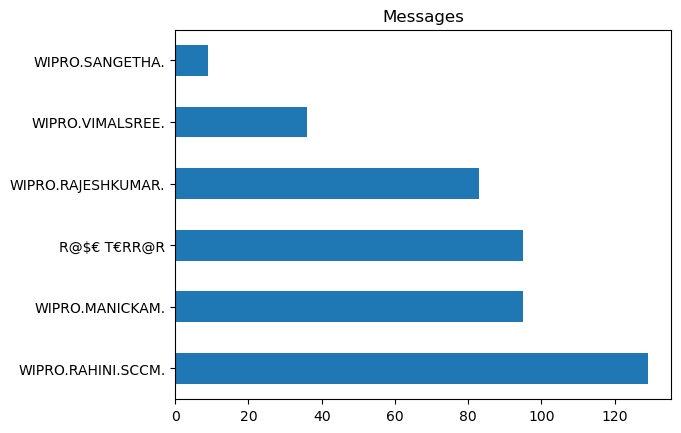

In [167]:
author_value_counts = df['Author'].value_counts() # Number of messages per author
top_10_author_value_counts = author_value_counts # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() # Plot 
print (author_value_counts)
author_value_counts.plot.barh(title="Messages")

In [168]:
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()


,Date,Time,Author,Message
95,27/04/20,5:15 pm,None,WIPRO.RAHINI.SCCM.: Come and join me in Ludo W...
101,27/04/20,7:32 pm,None,WIPRO.RAHINI.SCCM.: Come and join me in Ludo W...
193,28/04/20,6:22 pm,None,WIPRO.RAJESHKUMAR.: https://ludosuperstar.cn/m...
198,28/04/20,7:07 pm,None,WIPRO.RAHINI.SCCM.: Come and join me in Ludo W...
203,28/04/20,9:41 pm,None,WIPRO.VIMALSREE.: Come and join me in Ludo Wor...


WIPRO.RAHINI.SCCM.    5
WIPRO.VIMALSREE.      4
WIPRO.RAJESHKUMAR.    4
WIPRO.MANICKAM.       4
WIPRO.SANGETHA.       1
R@$€ T€RR@R           1
Name: Author, dtype: int64


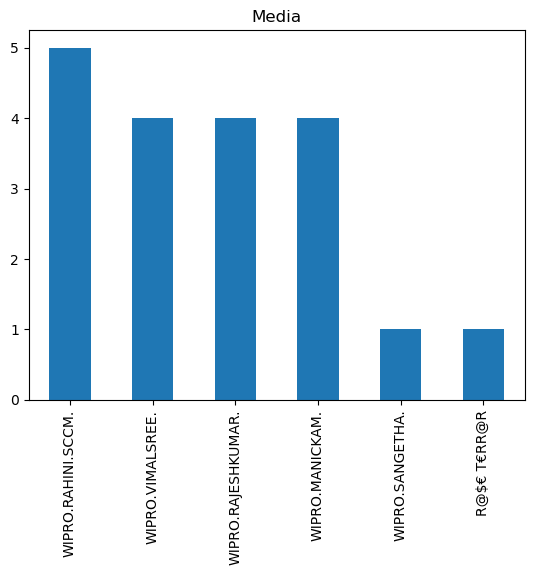

In [169]:
media_messages_df = df[df['Message'] == '<Media omitted>']
#print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
print (author_media_messages_value_counts)
#top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
#top_10_author_media_messages_value_counts.plot.barh()
author_media_messages_value_counts.plot.bar(title="Media")


In [193]:
import emoji,string
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
#df['Emoji_Count'] = df['Message'].apply(lambda s : sum([len(n) for n in s if emoji.demojize(n)!=n]))
df['Emoji_Count'] = df['Message'].apply(lambda s : emoji.emoji_count(s))
df['Emojis'] = df['Message'].apply(lambda s : [n for n in s if emoji.demojize(n)!=n 
                                               and emoji.demojize(n).count('skin_tone')==0 and emoji.demojize(n).count('male_sign')==0] )

df['Word_Count'] = df['Message'].apply(lambda s : len([w for w in s.split(' ') if w not in string.punctuation]))






In [195]:
total_members = list(df[df['Author'].notnull()].Author.unique())

print (df.Author.nunique(dropna=True))


print (df['Letter_Count'].sum(), df['Word_Count'].sum(),df['Emoji_Count'].sum(),df.Message.count(),df.Author.count())
"""df.head()

df[(df['Author'].notnull()) | (df['Changed_Author'].notnull())].Word_Count.sum()

author_media_messages_value_counts.sum()"""
max_date = pd.to_datetime(df['Date']+ ' ' +df['Time'],errors='ignore').max()
min_date = pd.to_datetime(df['Date']+ ' ' +df['Time'],errors='ignore').min()

date_diff = max_date-min_date


total = [('total messages', int(df.count().Author)),
             ('total media', int(author_media_messages_value_counts.sum())),
            ('total emojis', int(df['Emoji_Count'].sum())),
        ('total words',int(df['Word_Count'].sum())),
        ('total letters',int(df['Letter_Count'].sum())),
        ('total days',date_diff.days)]

print (total)
date_diff.to_timedelta64()

6
11346 1757 201 453 447
[('total messages', 447), ('total media', 19), ('total emojis', 201), ('total words', 1757), ('total letters', 11346), ('total days', 116)]


numpy.timedelta64(10069800000000000,'ns')

In [196]:
dic={'a':[1,2,3],'b':[]}
if not dic.get('b'):
     print ('j')

j


In [197]:
df.groupby(['Author','Emojis'])

In [198]:
continuous_columns = ['Letter_Count', 'Word_Count','Emoji_Count']
df[continuous_columns].describe()

,Letter_Count,Word_Count,Emoji_Count
count,453.000000,453.000000,453.000000
mean,25.046358,3.878587,0.443709
std,30.022854,3.648349,1.114878
min,1.000000,1.000000,0.000000
25%,9.000000,1.000000,0.000000
50%,17.000000,3.000000,0.000000
75%,30.000000,5.000000,0.000000
max,231.000000,24.000000,7.000000


In [243]:
import emoji
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
df['Emoji_Count'] = df['Message'].apply(lambda s : sum([len(n) for n in s if emoji.demojize(n)!=n]))
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))
#df.loc[(df['Emojis']==[])]

df.loc[(df['Emojis'] == ['🤣'] )]

ValueError: Lengths must match to compare

In [176]:

print (pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='ignore').min())
print (pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='ignore').max())
df.head()

2020-01-05 10:05:00
2020-04-30 23:15:00


,Date,Time,Author,Message,Letter_Count,Emoji_Count,Emojis,Word_Count
0,27/04/20,2:38 pm,WIPRO.VIMALSREE.,<Media omitted>,15,0,[],2
1,27/04/20,2:38 pm,WIPRO.VIMALSREE.,<Media omitted>,15,0,[],2
2,27/04/20,2:41 pm,R@$€ T€RR@R,wowwwww,7,0,[],1
3,27/04/20,2:43 pm,WIPRO.RAHINI.SCCM.,nice,4,0,[],1
4,27/04/20,2:43 pm,WIPRO.MANICKAM.,Soruna udane vanthuru,21,0,[],3


In [177]:
import numpy
df['Letter_Count'].sum(), df['Word_Count'].sum(),df['Emoji_Count'].sum(),df.Message.count(),df.Author.count()

#df['Added_Authors'] = df.loc[(df['Author'].isnull())]
#df['Changed_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('changed|deleted',regex=True))].Message.str.split(' ',2).apply(lambda s: s[0]+' '+s[1] if s[0]!='You' and s[1]!='were' else s[0])
df['Changed_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('changed|deleted',regex=True))].Message.apply(lambda s : re.sub(r' (changed|deleted).*$','',s) if re.sub(r' (changed|deleted).*$','',s)!= 'You' or re.sub(r' (changed|deleted).*$','',s).count('security code')!=1 else numpy.NaN)
df[df.Changed_Author.notnull()]

#df['Added_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('added',regex=True))].Message.str.split(' ',2).apply(lambda s: s[0]+' '+s[1] if s[0]!='You' else (s[0]+' '+s[1] if s[1]=='were' else s[0]))
df['Added_Author'] = df.loc[(df['Author'].isnull()) &  (df['Message'].str.contains('added',regex=True))].Message.apply(lambda s : re.sub(r' added.*$', '', s))


df['Removed_Author'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('removed',regex=True))].Message.apply(lambda s : re.sub(r' removed.*$', '', s))
df[df.Removed_Author.notnull()]

df['Left_People'] = df.loc[(df['Author'].isnull()) & (df['Message'].str.contains('left$',regex=True))].Message.apply(lambda s : re.sub(r' left$', '', s))
df[df.Left_People.notnull()]


#print (df.groupby(df['Changed_Author']).count()['Message'])

#print (df.groupby(df['Left_People']).count()['Date'])

#print (df.groupby(df['Removed_Author']).count()['Message'])
times_calculator = {1:'Once',2:'Twice',3:'Thrice'}
changed_auth = [(name,times_calculator.setdefault(count,str(count)+' times')) for name,count in df.groupby(df['Changed_Author']).count()['Message'].iteritems()]
left_people = [(name,times_calculator.setdefault(count,str(count)+' times')) for name,count in df.groupby(df['Left_People']).count()['Message'].iteritems()]
removed_people = [(name,times_calculator.setdefault(count,str(count)+' times')) for name,count in df.groupby(df['Removed_Author']).count()['Message'].iteritems()]
added_people = [(name,times_calculator.setdefault(count,str(count)+' times')) for name,count in df.groupby(df['Added_Author']).count()['Message'].iteritems()]

changed_auth,left_people,removed_people,added_people


([], [], [], [])

In [178]:
df[['Message','Word_Count','Emoji_Count','Author']].head()
#df.loc[(df['Message'].str.contains('Man who sold coffee'))]

,Message,Word_Count,Emoji_Count,Author
0,<Media omitted>,2,0,WIPRO.VIMALSREE.
1,<Media omitted>,2,0,WIPRO.VIMALSREE.
2,wowwwww,1,0,R@$€ T€RR@R
3,nice,1,0,WIPRO.RAHINI.SCCM.
4,Soruna udane vanthuru,3,0,WIPRO.MANICKAM.


Total Message Sent :  447
Users Contributed Count :  6
Users Contributed :  ['WIPRO.VIMALSREE.' 'R@$€ T€RR@R' 'WIPRO.RAHINI.SCCM.' 'WIPRO.MANICKAM.'
 'WIPRO.SANGETHA.' 'WIPRO.RAJESHKUMAR.']
24
Longest Message is sent by : "  WIPRO.SANGETHA. " and the message has :  24  words
WIPRO.RAHINI.SCCM.    129
WIPRO.MANICKAM.        95
R@$€ T€RR@R            95
WIPRO.RAJESHKUMAR.     83
WIPRO.VIMALSREE.       36
WIPRO.SANGETHA.         9
Name: Author, dtype: int64


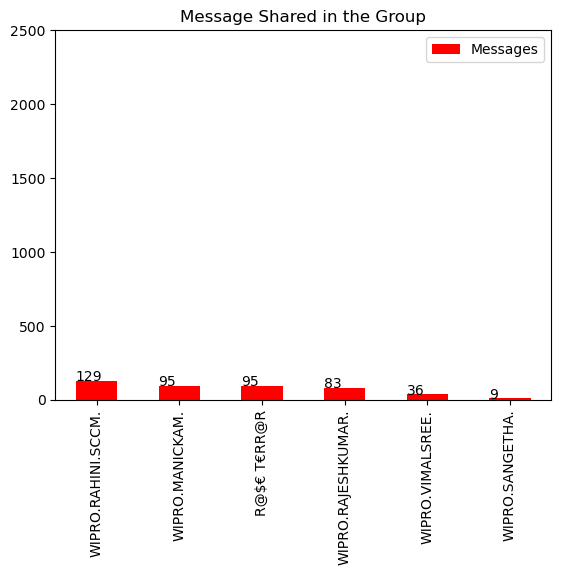

In [179]:
import matplotlib as mpl

mpl.style.use("default")
print ("Total Message Sent : ", df.count().Author)
print ("Users Contributed Count : ", df['Author'].nunique())
print ("Users Contributed : ", df['Author'].dropna().unique())
author_value_counts = df['Author'].value_counts() # Number of messages per author
ax = author_value_counts.plot.bar(color=['#FF0000'],title="Message Shared in the Group",legend=True,
                                   edgecolor="#00FF00", linewidth=0.0,yticks=[x for x in range(0,3000,500)])
print (df['Word_Count'].max())
longest_message,longest_msg =df['Word_Count'].max(),df.iloc[df.Word_Count.idxmax()][['Message','Author']]
#print ("""Longest Message is sent by : " """, longest_msg.Author, """" and the message has : """,longest_message,""" words""",longest_msg.Message)
print ("""Longest Message is sent by : " """, longest_msg.Author, """" and the message has : """,longest_message,""" words""")
#df.iloc[df.Emoji_Count.idxmax()].Message
#df['Author'].value_counts()
print (author_value_counts)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))
ax.legend(['Messages'])


In [180]:
import numpy
from collections import Counter
def emoji_per_person_usage_cal(emoji_list,emoji_values):
    emoji_stacked_data = {'Name':[]}
    for emo in emoji_list:
        for author,data in emoji_values:
            if emoji_stacked_data['Name'].count(author)==0:
                emoji_stacked_data['Name'].append(author)

            if not emoji_stacked_data.get(emo[0]):
                emoji_stacked_data[emo[0]]=[]
                emoji_stacked_data[emo[0]].append([ n for ind,val in data.items() for n in val if val!=[]].count(emo[0]))
            else:
                emoji_stacked_data[emo[0]].append([ n for ind,val in data.items() for n in val if val!=[]].count(emo[0]))
    return emoji_stacked_data


emoji_data = df[df.Emojis.apply(lambda s: s if s!=[] else None).notnull()]
emoji_list = Counter([n for ind,val in emoji_data.Emojis.items() for n in val]).most_common(10)


message_emoji=df.groupby(['Author']).Emojis
group_name_emoji=df.groupby(['Changed_Author']).Emojis

msg_emoji_stacked_data = emoji_per_person_usage_cal(emoji_list,message_emoji)

group_emoji_stacked_data = emoji_per_person_usage_cal(emoji_list,group_name_emoji)

#print (msg_emoji_stacked_data)
#print (group_emoji_stacked_data)

for key,value in group_emoji_stacked_data.items():
    if key!='Name':
        
        if sum(value)>0:
            #print (value)
            greater_value=[ind for ind,val in enumerate(value) if val>0]
            for val in greater_value:
                #print (group_emoji_stacked_data['Name'][value.index(val)],key)
                try:
                    msg_emoji_stacked_data['Name'].index(group_emoji_stacked_data['Name'][value.index(val)])
                except:
                    pass
                else:
                    name_col = msg_emoji_stacked_data['Name'].index(group_emoji_stacked_data['Name'][value.index(val)])
                    #print (name_col)
                    #print (msg_emoji_stacked_data[key][name_col])
                    msg_emoji_stacked_data[key][name_col]+=val
                    #print (msg_emoji_stacked_data[key][name_col])
emoji_stacked_data=[[m for m in msg_emoji_stacked_data.keys()]]

 


    

emoji_stacked_data.append((numpy.asarray([n for n in msg_emoji_stacked_data.values()],dtype=object).transpose()).tolist())
emoji_stacked_data
df[df.Emojis.apply(lambda s: s if s!=[] else None).notnull()]


,Date,Time,Author,Message,Letter_Count,Emoji_Count,Emojis,Word_Count,Changed_Author,Added_Author,Removed_Author,Left_People
7,27/04/20,2:44 pm,WIPRO.RAHINI.SCCM.,🤣,1,1,[🤣],1,NaN,NaN,NaN,NaN
9,27/04/20,2:45 pm,R@$€ T€RR@R,😋😋😋,3,3,"[😋, 😋, 😋]",1,NaN,NaN,NaN,NaN
11,27/04/20,2:45 pm,WIPRO.VIMALSREE.,😂😂😂,3,3,"[😂, 😂, 😂]",1,NaN,NaN,NaN,NaN
16,27/04/20,2:46 pm,WIPRO.VIMALSREE.,👊🏻🤦🏼‍♀️,7,6,"[👊, 🤦, ️]",1,NaN,NaN,NaN,NaN
18,27/04/20,2:49 pm,WIPRO.MANICKAM.,😁😁😁,3,3,"[😁, 😁, 😁]",1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
446,01/05/20,11:05 am,WIPRO.RAJESHKUMAR.,🤩🤩🤩🤩Nandrigal,13,4,"[🤩, 🤩, 🤩, 🤩]",1,NaN,NaN,NaN,NaN
447,01/05/20,11:20 am,WIPRO.RAHINI.SCCM.,Vimal😩,6,1,[😩],1,NaN,NaN,NaN,NaN
448,01/05/20,11:43 am,WIPRO.VIMALSREE.,OK beauty... Don't cry😂😂😂,25,3,"[😂, 😂, 😂]",4,NaN,NaN,NaN,NaN
449,01/05/20,11:53 am,WIPRO.RAHINI.SCCM.,Haahha onu beauty ilaa patti🤣,29,1,[🤣],5,NaN,NaN,NaN,NaN


Total Emoji Sent :  211


{'Name': []}

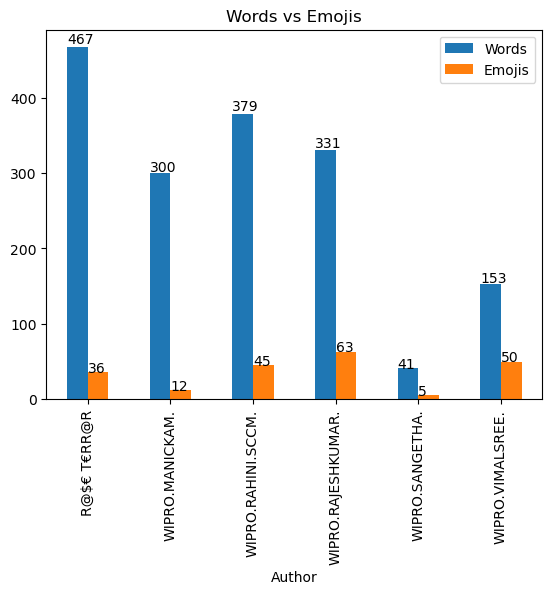

In [181]:
print ("Total Emoji Sent : ", df[df['Author'].notnull()].Emoji_Count.sum())
msg_emoji = df.groupby(['Author']).sum()['Emoji_Count']
group_name_emoji = df.groupby(['Changed_Author']).sum()['Emoji_Count']

sent_emoji = msg_emoji.add(group_name_emoji,fill_value=0).apply(lambda s :int(s))
#sent_emoji.plot.bar(sort_columns =True)
words_by_author = df.groupby(['Author']).sum()['Word_Count']
new_df = pd.concat([words_by_author,sent_emoji],axis=1,join="outer")

ex = new_df.plot.bar(title="Words vs Emojis")
for p in ex.patches:
    ex.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))
ex.legend(['Words','Emojis'])

#print ("Users Contributed Count : ", df['Author'].nunique())
#print ("Users Contributed : ", df['Author'].dropna().unique())
#author_value_counts = df['Author'].value_counts() # Number of messages per author
#ax = author_value_counts.plot.bar(color=['#FF0000'],title="Message",legend=True,
#                                   edgecolor="#00FF00", linewidth=0.0,yticks=[x for x in range(0,3000,500)])
#print (df['Word_Count'].max())
#longest_message,longest_msg =df['Word_Count'].max(),df.iloc[df.Word_Count.idxmax()][['Message','Author']]

#df.iloc[df.Emoji_Count.idxmax()].Message
#df['Author'].value_counts()
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))"""
#words_by_author

sent_emoji.sort_values(ascending=False)
group_emoji_stacked_data

In [182]:
#Row 4
word_list = pd.Series(' '.join(df.loc[~(df['Message'].str.contains('<Media.* | omitted>.$',regex=True))
                                     & (df['Message'].apply(lambda s: [w for w in s.split(' ') if emoji.emoji_count(w)==0]))].Message).lower().split()).value_counts()[:10]

most=[('texts sent',author_value_counts.idxmax(),author_value_counts.max()),
           ('emoji sent',sent_emoji.idxmax(),sent_emoji.max()),
      ('media shared',author_media_messages_value_counts.idxmax(),author_media_messages_value_counts.max()),
      ('Used Word',word_list.idxmax(),word_list.max()),
      ('Used Emoji',emoji_list[0][0],emoji_list[0][1]),
      ('Texted Day',date_group.Message.count().idxmax(),date_group.Message.count().max())
     ]
print (most)
print (word_list)


longest_message,longest_msg =int(df['Word_Count'].max()),df.iloc[df.Word_Count.idxmax()][['Message','Author','Date']]



[('texts sent', 'WIPRO.RAHINI.SCCM.', 129), ('emoji sent', 'WIPRO.RAJESHKUMAR.', 63), ('media shared', 'WIPRO.RAHINI.SCCM.', 5), ('Used Word', 'to', 21), ('Used Emoji', '😂', 43), ('Texted Day', '30/04/20', 123)]
to      21
ah      17
ludo    15
the     13
la      13
and     12
tha     11
ok      10
ne      10
ku       9
dtype: int64


Total Words :  1671
19
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


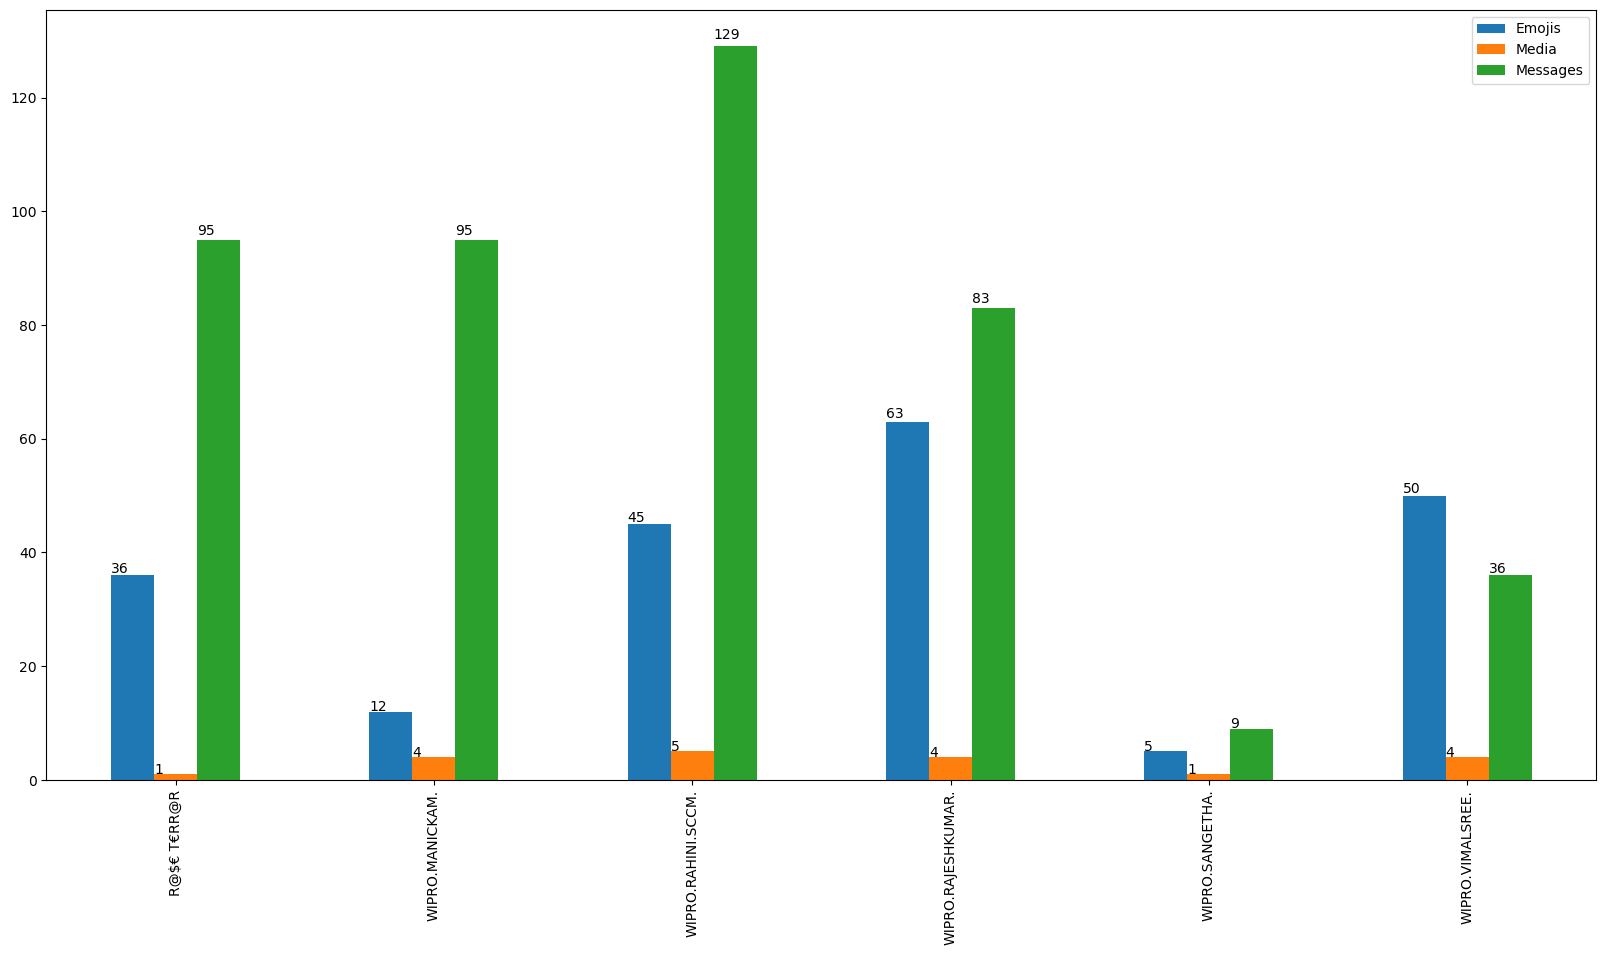

In [183]:
msg_word_by_author=df.groupby(['Author']).sum()['Word_Count']
changed_word_by_author = df.groupby(['Changed_Author']).sum()['Word_Count']
print ("Total Words : ",df[(df['Author'].notnull()) | (df['Changed_Author'].notnull())].Word_Count.sum())
words_by_author = msg_word_by_author.add(changed_word_by_author,fill_value=0).apply(lambda s: int(s))

#media_by_author=df.groupby(['Author']).sum()['Media_count']
author_media_messages_value_counts = author_media_messages_value_counts.apply(lambda s: int(s))
print (author_media_messages_value_counts.sum())
print (type(words_by_author))
print (type(sent_emoji))
print (type(author_media_messages_value_counts))
#new_df = pd.concat([words_by_author,sent_emoji,author_media_messages_value_counts,author_value_counts],axis=1,join="outer").astype(dtype='Int64')
new_df = pd.concat([sent_emoji,author_media_messages_value_counts,author_value_counts],axis=1,join="outer").astype(dtype='Int64')

ex = new_df.plot.bar(figsize=[20,10])
for p in ex.patches:
    ex.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))
ex.legend(['Emojis','Media','Messages'])

#pd.concat([df.Word_Count,df.Emoji_Count],axis=1)

In [184]:

final_df = pd.concat([author_value_counts,sent_emoji,author_media_messages_value_counts,words_by_author],axis=1,join="outer").astype(dtype='Int64').fillna(0)
final_output = [[m,n[0],n[-3],n[-2],n[-1]] for m,n in [[n,list(j)] for n,j in final_df.iterrows()]]

final_output


[['WIPRO.RAHINI.SCCM.', 129, 45, 5, 379],
 ['WIPRO.MANICKAM.', 95, 12, 4, 300],
 ['R@$€ T€RR@R', 95, 36, 1, 467],
 ['WIPRO.RAJESHKUMAR.', 83, 63, 4, 331],
 ['WIPRO.VIMALSREE.', 36, 50, 4, 153],
 ['WIPRO.SANGETHA.', 9, 5, 1, 41]]

In [185]:
days = [str(n).zfill(2) for n in range(1,29)]
cases = [3,6,7,29,30,31,34,40,47,62,62,74,82,100,114,129,143,169,194,249,332,396,499,536,657,727,887,987]

In [186]:
func = lambda lst : [int(((n-lst[a-1])/lst[a-1])*100) for a,n in enumerate(lst) if a!=0 ]

*Mar01* : *0%* of increase
*Mar02* : *100%* of increase
*Mar03* : *16%* of increase
*Mar04* : *314%* of increase
*Mar05* : *3%* of increase
*Mar06* : *3%* of increase
*Mar07* : *9%* of increase
*Mar08* : *17%* of increase
*Mar09* : *17%* of increase
*Mar10* : *31%* of increase
*Mar11* : *0%* of increase
*Mar12* : *19%* of increase
*Mar13* : *10%* of increase
*Mar14* : *21%* of increase
*Mar15* : *14%* of increase
*Mar16* : *13%* of increase
*Mar17* : *10%* of increase
*Mar18* : *18%* of increase
*Mar19* : *14%* of increase
*Mar20* : *28%* of increase
*Mar21* : *33%* of increase
*Mar22* : *19%* of increase
*Mar23* : *26%* of increase
*Mar24* : *7%* of increase
*Mar25* : *22%* of increase
*Mar26* : *10%* of increase
*Mar27* : *22%* of increase
*Mar28* : *11%* of increase


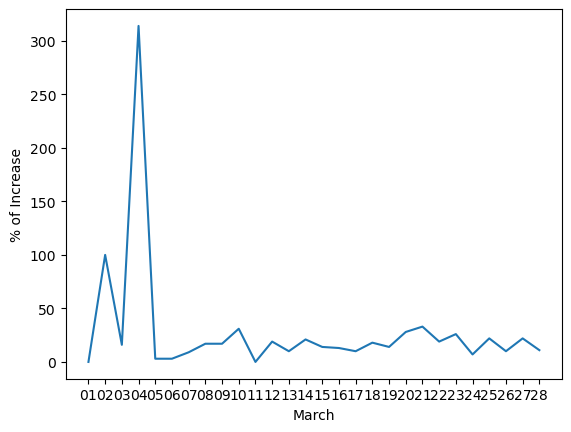

In [187]:
lst =[0]+func(cases)
for day,per in list(zip(days,lst)):
    print ('*Mar'+day +'* : *'+str(per) +"%* of increase")
import matplotlib.pyplot as plt
plt.xlabel("March")
plt.ylabel("% of Increase")
plt.plot(days,lst)


In [188]:
[(m,n) for m,n in sent_emoji.items()]

[('R@$€ T€RR@R', 36),
 ('WIPRO.MANICKAM.', 12),
 ('WIPRO.RAHINI.SCCM.', 45),
 ('WIPRO.RAJESHKUMAR.', 63),
 ('WIPRO.SANGETHA.', 5),
 ('WIPRO.VIMALSREE.', 50)]

In [191]:
s='😁😁😁😁😁😁😁😁 dai . cha😁i'
for n,j in emoji_list:
    print (emoji.demojize(n))

:face_with_tears_of_joy:
:rolling_on_the_floor_laughing:
:face_with_rolling_eyes:
:beaming_face_with_smiling_eyes:

:person_facepalming:
:face_savoring_food:
:folded_hands:
:thumbs_up:
:thinking_face:


In [62]:
f=lambda s : sum([len(n) for n in s if emoji.demojize(n)!=n])
g=lambda s : len(s.split(' '))

In [63]:
g(s)

4

In [64]:
x="WhatsApp Chat with 👊 வாழு..!! வாழ விடு.!! 💦.txt"

In [65]:
x.split("WhatsApp Chat with")[1].split('.txt')[0]

' 👊 வாழு..!! வாழ விடு.!! 💦'